In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel (r'COMP5122M_Aug_2020.xlsx', sheet_name='Data')

In [16]:
def Avg(lst): 
    return sum(lst) / len(lst)

In [3]:
leave = {}
remain = {}
referendum = {}

for index, row in df.iterrows():
    referendum[row["ONS code"]] = row["Brexit referendum"]
    leave[row["ONS code"]] = row["Leave petition"]
    remain[row["ONS code"]] = row["Remain petition"]
sorted_dict = {k: v for k, v in sorted(referendum.items(), key=lambda item: item[1])}

c = list()
r = list()
l = list()
b = list()
for key in sorted_dict:
    c.append(key)
    r.append(remain[key])
    l.append(leave[key])
    b.append(referendum[key])

We can now plot the referendum results with number of signed petitions to leave and the signed petitions to remain per constituency.

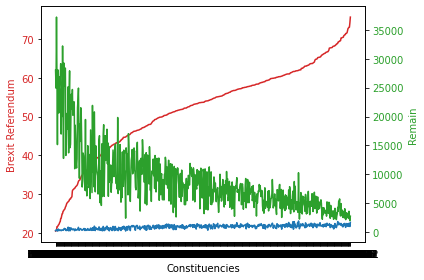

In [4]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Constituencies')
ax1.set_ylabel('Brexit Referendum', color=color)
ax1.plot(c, b, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Leave', color=color)  # we already handled the x-label with ax1
ax2.plot(c, l, color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.set_ylabel('Remain', color=color)  # we already handled the x-label with ax1
ax2.plot(c, r, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#How to plot in two axis: https://matplotlib.org/gallery/api/two_scales.html

In [19]:
constE = 0
constS = 0
constW = 0

constER = 0
constEL = 0
constSR = 0
constSL = 0
constWR = 0
constWL = 0

refE = list()
refS = list()
refW = list()

petitionsEL = 0
petitionsER = 0
petitionsSL = 0
petitionsSR = 0
petitionsWL = 0
petitionsWR = 0

for index, row in df.iterrows():
    if (row["Country"] == 'England'):
        constE += 1
        petitionsER += row["Remain petition"] 
        petitionsEL += row["Leave petition"]
        refE.append(row["Brexit referendum"])
        if row["Brexit referendum"] >= 50:
            constEL += 1
        else:
            constER += 1
        
    elif (row["Country"] == 'Scotland'):
        constS += 1
        petitionsSR += row["Remain petition"] 
        petitionsSL += row["Leave petition"]
        refS.append(row["Brexit referendum"])
        if row["Brexit referendum"] >= 50:
            constSL += 1
        else:
            constSR += 1
    else:
        constW += 1
        petitionsWR += row["Remain petition"] 
        petitionsWL += row["Leave petition"]
        refW.append(row["Brexit referendum"])
        if row["Brexit referendum"] >= 50:
            constWL += 1
        else:
            constWR += 1
        
print("Constituencies in England:  ", constE)
print("Constituencies in Scotland: ", constS)
print("Constituencies in Wales:    ", constW)     

Constituencies in England:   533
Constituencies in Scotland:  59
Constituencies in Wales:     40


We can now calculate the number of signatures to remain and to leave per country, the proportion of these petitions per country, the average of the referendum results in each  constituency per country and how many constituencies per contry voted to either remain or leave.

In [23]:
print("Remain signatures in England:  ", petitionsER)
print("Remain signatures in Scotland: ", petitionsSR)
print("Remain signatures in Wales:    ", petitionsWR)
print()
print("Leave signatures in England:  ", petitionsEL)
print("Leave signatures in Scotland: ", petitionsSL)
print("Leave signatures in Wales:    ", petitionsWL)
print()
print("Proportion of Remain petitions in England:  ", (petitionsER) / (petitionsEL + petitionsER))
print("Proportion of Remain petitions in Scotland: ", (petitionsSR) / (petitionsSL + petitionsSR))
print("Proportion of Remain petitions in Wales:    ", (petitionsWR) / (petitionsWL + petitionsWR))
print()
print("Referendum results in England:  ", round(Avg(refE),2), "% in favour of 'leave'")
print("Referendum results in Scotland: ", round(Avg(refS),2), "% in favour of 'leave'")
print("Referendum results in Wales:    ", round(Avg(refW),2), "% in favour of 'leave'")
print()
print("Constituencies in England if favour of leave:   ", constEL, ", (", round( 100 * (constEL/(constEL+constER)),2),"%)")
print("Constituencies in England if favour of remain:  ", constER, ", (", round( 100 * (constER/(constEL+constER)),2),"%)")
print("Constituencies in Scotland if favour of leave:  ", constSL, ", (", round( 100 * (constSL/(constSL+constSR)),2),"%)")
print("Constituencies in Scotland if favour of remain: ", constSR, ", (", round( 100 * (constSR/(constSL+constSR)),2),"%)")
print("Constituencies in Wales if favour of leave:     ", constWL, ", (", round( 100 * (constWL/(constWL+constWR)),2),"%)")
print("Constituencies in Wales if favour of remain:    ", constWR, ", (", round( 100 * (constWR/(constWL+constWR)),2),"%)")

Remain signatures in England:   4823464
Remain signatures in Scotland:  561198
Remain signatures in Wales:     226570

Leave signatures in England:   531648
Leave signatures in Scotland:  23472
Leave signatures in Wales:     27883

Proportion of Remain petitions in England:   0.9007214041461691
Proportion of Remain petitions in Scotland:  0.9598542767715121
Proportion of Remain petitions in Wales:     0.8904198417782458

Referendum results in England:   53.55 % in favour of 'leave'
Referendum results in Scotland:  38.19 % in favour of 'leave'
Referendum results in Wales:     52.69 % in favour of 'leave'

Constituencies in England if favour of leave:    372 , ( 69.79 %)
Constituencies in England if favour of remain:   161 , ( 30.21 %)
Constituencies in Scotland if favour of leave:   2 , ( 3.39 %)
Constituencies in Scotland if favour of remain:  57 , ( 96.61 %)
Constituencies in Wales if favour of leave:      29 , ( 72.5 %)
Constituencies in Wales if favour of remain:     11 , ( 27.5 %)


We can calculate the signatures to leave and to remain per constituency in each country.

In [24]:
print("Remain signatures in England per constituency:  ", round(petitionsER/constE,2))
print("Remain signatures in Scotland per constituency: ", round(petitionsSR/constS,2))
print("Remain signatures in Wales per constituency:    ", round(petitionsWR/constW,2))
print()
print("Leave signatures in England per constituency:  ", round(petitionsEL/constE,2))
print("Leave signatures in Scotland per constituency: ", round(petitionsSL/constS,2))
print("Leave signatures in Wales per constituency:    ", round(petitionsWL/constW,2))

Remain signatures in England per constituency:   9049.65
Remain signatures in Scotland per constituency:  9511.83
Remain signatures in Wales per constituency:     5664.25

Leave signatures in England per constituency:   997.46
Leave signatures in Scotland per constituency:  397.83
Leave signatures in Wales per constituency:     697.08
